In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Data preparation

In [2]:
df = pd.read_csv('/Users/roozbeh/Library/CloudStorage/GoogleDrive-rouzbeh.shirvani01@universitadipavia.it/My Drive/Pavia/EDPR/Data/Elena/PVGIS_NEW.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140255 entries, 0 to 140254
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        140255 non-null  object 
 1   temp_min    140255 non-null  float64
 2   temp_max    140255 non-null  float64
 3   pressure    140255 non-null  int64  
 4   humidity    140255 non-null  int64  
 5   wind_speed  140255 non-null  float64
 6   Gb(i)       140255 non-null  float64
 7   Gd(i)       140255 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 8.6+ MB


In [4]:
df['time'] = df['time'].str.replace(' UTC', '', regex=False)
df['time'] = pd.to_datetime(df['time'], utc=True)

In [5]:
df= df.set_index('time')

In [6]:
df.columns

Index(['temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'Gb(i)',
       'Gd(i)'],
      dtype='object')

In [7]:
# df['day'] = df.index.day
# df['month'] = df.index.month

In [8]:
# df_filtered = df[['Gd(i)', 'T2m', 'WS10m']]

df_filtered = df[['temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'Gb(i)', 'Gd(i)']]

In [9]:
df_filtered

,temp_min,temp_max,pressure,humidity,wind_speed,Gb(i),Gd(i)
time,,,,,,,
2005-01-01 00:00:00+00:00,1.76,4.16,1024,91,1.84,0.0,0.0
2005-01-01 01:00:00+00:00,2.07,4.43,1024,90,2.22,0.0,0.0
2005-01-01 02:00:00+00:00,1.44,3.93,1024,90,2.27,0.0,0.0
2005-01-01 03:00:00+00:00,1.43,3.92,1023,90,2.28,0.0,0.0
2005-01-01 04:00:00+00:00,1.22,3.78,1023,91,2.33,0.0,0.0
...,...,...,...,...,...,...,...
2020-12-31 18:00:00+00:00,4.51,5.95,1013,85,1.98,0.0,0.0
2020-12-31 19:00:00+00:00,3.94,5.39,1014,85,1.62,0.0,0.0
2020-12-31 20:00:00+00:00,3.39,5.39,1015,88,1.71,0.0,0.0


In [10]:
df_filtered = df.loc['2005-01-01 00:00:00':'2015-12-31 23:00:00']

In [23]:
daily_averages = df_filtered.resample('D').mean()
train_features = []
train_labels = []

# Loop over each day, aligning daily averages with the same day's hourly values
for i in range(len(daily_averages)):
    # Get daily average for the current day
    daily_avg = daily_averages.iloc[i]

    # Get the 24 hourly values for the same day
    hourly_values = df_filtered['Gd(i)'][i*24:(i+1)*24]

    # Ensure we have 24 hourly values
    if len(hourly_values) == 24:
        train_features.append(daily_avg.values)
        train_labels.append(hourly_values.values)

In [24]:
# Calculate indices for splitting
total_samples = len(train_features)
train_end = int(total_samples * 0.7)
val_end = int(total_samples * 0.85)

# Split the dataset
train_feat, train_lab = train_features[:train_end], train_labels[:train_end]
val_features, val_labels = train_features[train_end:val_end], train_labels[train_end:val_end]
test_features, test_labels = train_features[val_end:], train_labels[val_end:]

In [25]:
train_feat = np.vstack(train_feat)
train_lab = np.vstack(train_lab)

val_features = np.vstack(val_features)
val_labels = np.vstack(val_labels)

test_features = np.vstack(test_features)
test_labels = np.vstack(test_labels)

## Splitting the train, test, and validation sets

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_features)

label_scaler = MinMaxScaler()
label_scaler.fit_transform(train_labels)

# Transform both training and test data
train_features_scaled = scaler.transform(train_feat)
train_lab_scaled = label_scaler.transform(train_lab)

test_features_scaled = scaler.transform(test_features)
test_labels_scaled = label_scaler.transform(test_labels)

val_features_scaled = scaler.transform(val_features)
val_labels_scaled = label_scaler.transform(val_labels)

In [27]:
train_features_scaled

array([[0.28230923, 0.23863011, 0.71551052, ..., 0.21944736, 0.18846477,
        0.33683546],
       [0.28136537, 0.24353567, 0.71083398, ..., 0.21434068, 0.63790038,
        0.28030939],
       [0.24566602, 0.19906474, 0.7147311 , ..., 0.46044071, 0.13823307,
        0.30058419],
       ...,
       [0.73810918, 0.66928755, 0.59703819, ..., 0.12626793, 0.75865238,
        0.49997183],
       [0.74061817, 0.66171144, 0.59781761, ..., 0.09268975, 0.81432801,
        0.39824011],
       [0.72254149, 0.64529846, 0.59703819, ..., 0.09828611, 0.7367011 ,
        0.4741171 ]])

# Define the Neural Network

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2, l1

l2_factor = 0.05
l1_factor = 0.05

model = Sequential([
    Dense(units=20, activation='relu', input_shape= (train_features_scaled.shape[1],)),
    Dense(units=24)  # Output layer
])
model.compile(optimizer='adam', loss='mae')

Train the Model

In [29]:
history = model.fit(train_features_scaled, train_lab_scaled, epochs=300, batch_size=10, verbose=1)

Epoch 1/300
282/282 [==============================] - 0s 368us/step - loss: 0.1356
Epoch 2/300
282/282 [==============================] - 0s 331us/step - loss: 0.0760
Epoch 3/300
282/282 [==============================] - 0s 329us/step - loss: 0.0681
Epoch 4/300
282/282 [==============================] - 0s 324us/step - loss: 0.0659
Epoch 5/300
282/282 [==============================] - 0s 330us/step - loss: 0.0650
Epoch 6/300
282/282 [==============================] - 0s 325us/step - loss: 0.0639
Epoch 7/300
282/282 [==============================] - 0s 336us/step - loss: 0.0631
Epoch 8/300
282/282 [==============================] - 0s 325us/step - loss: 0.0624
Epoch 9/300
282/282 [==============================] - 0s 326us/step - loss: 0.0619
Epoch 10/300
282/282 [==============================] - 0s 321us/step - loss: 0.0613
Epoch 11/300
282/282 [==============================] - 0s 329us/step - loss: 0.0609
Epoch 12/300
282/282 [==============================] - 0s 329us/step - lo

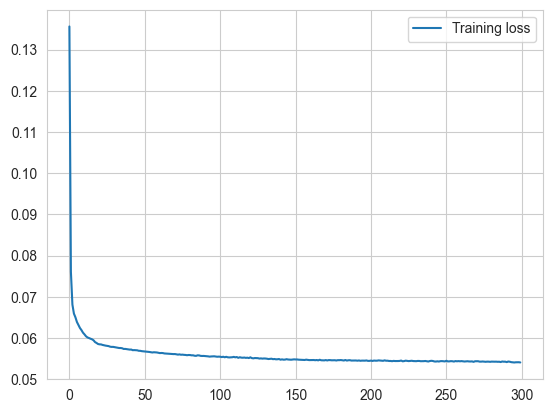

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.legend()
plt.show()


# Evaluate the model on test and validation

In [31]:
# Evaluate the model
loss_test = model.evaluate(test_features_scaled, test_labels_scaled, verbose=1)
print(f"Test MSE on test dataset: {loss_test}")


19/19 [==============================] - 0s 384us/step - loss: 0.0548
Test MSE on test dataset: 0.05475996807217598


19/19 [==============================] - 0s 332us/step


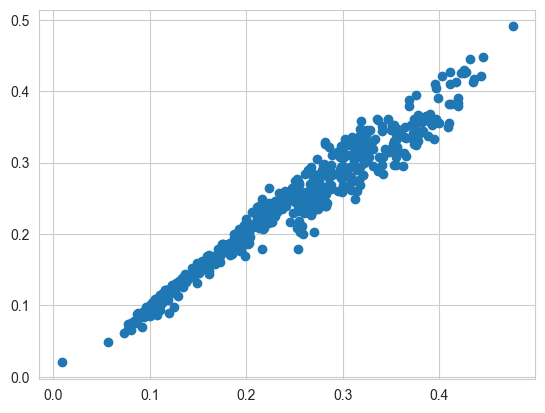

In [32]:
predictions_test = model.predict(test_features_scaled)
plt.scatter(test_labels_scaled.mean(axis = 1), predictions_test.mean(axis = 1))
plt.show()

In [33]:
loss_val = model.evaluate(val_features_scaled, val_labels_scaled, verbose=0)
print(f"Test MSE on validation dataset: {loss_val}")

Test MSE on validation dataset: 0.050527844578027725


19/19 [==============================] - 0s 389us/step


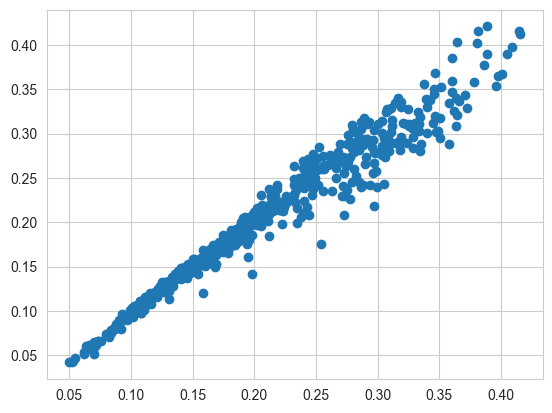

In [34]:
validation_test = model.predict(val_features_scaled)
plt.scatter(val_labels_scaled.mean(axis = 1), validation_test.mean(axis = 1))
plt.show()

# Evaluating the results on new year

In [63]:
df_2006 = df.loc['2020-01-01 00:00:00':'2020-12-30 23:00:00']

In [64]:
daily_averages_2006 = df_2006.resample('D').mean()
daily_averages_2006_scaled = scaler.transform(daily_averages_2006)

/Users/roozbeh/anaconda3/envs/SEST/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [65]:
predicted_hourly_values_scaled = model.predict(daily_averages_2006_scaled)

12/12 [==============================] - 0s 400us/step


In [66]:
predicted_hourly_values_scaled = np.where(predicted_hourly_values_scaled < 0, 0, predicted_hourly_values_scaled)

In [45]:
predicted_hourly_values_unscaled = label_scaler.inverse_transform(predicted_hourly_values_scaled)
predicted_hourly_values_1D = predicted_hourly_values_unscaled.reshape(-1)

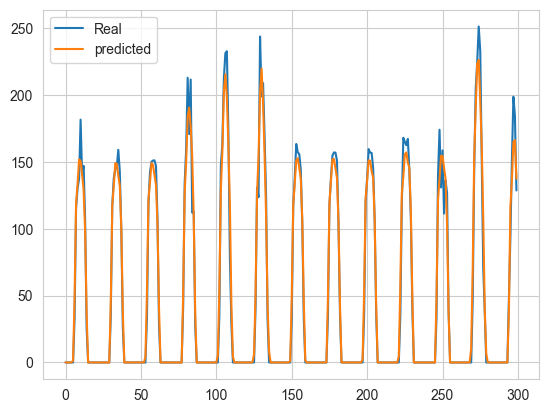

In [48]:
start_hour = 0
end_hour = 300
# Extract the subset for both predicted and actual values
subset_predicted = predicted_hourly_values_1D[start_hour:end_hour]
subset_actual = df_2006['Gd(i)'][start_hour:end_hour]

plt.plot(pd.DataFrame(subset_actual).reset_index(drop=True), label = 'Real')
plt.plot(subset_predicted, label = 'predicted')
plt.legend()
plt.show()

In [49]:
real_solar = pd.DataFrame(df_2006['Gd(i)']).reset_index(drop=True)
predicted_solar = predicted_hourly_values_1D

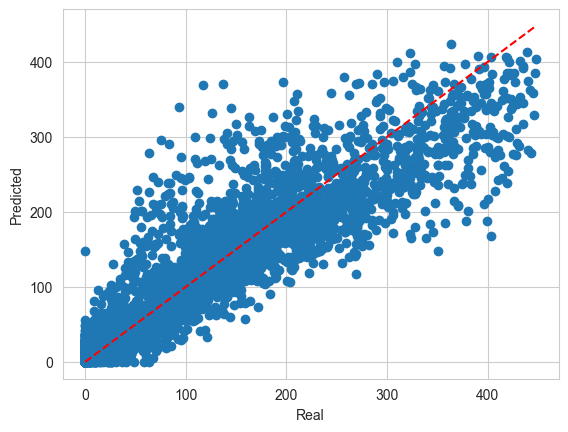

In [50]:
plt.scatter(real_solar, predicted_solar)
max_value = max(max(real_solar.values)[0], predicted_solar.max())
min_value = min(min(real_solar.values)[0], predicted_solar.min())
plt.plot([0, max_value], [0, max_value], 'r--')  # Red dashed line
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(pd.DataFrame(df_2006['Gd(i)']).reset_index(drop=True), predicted_hourly_values_1D))
r_squared = r2_score(pd.DataFrame(df_2006['Gd(i)']).reset_index(drop=True), predicted_hourly_values_1D)
print("R-squared:", r_squared)
print("RMSE:", rmse)


R-squared: 0.8985171686257372
RMSE: 30.94063876325584


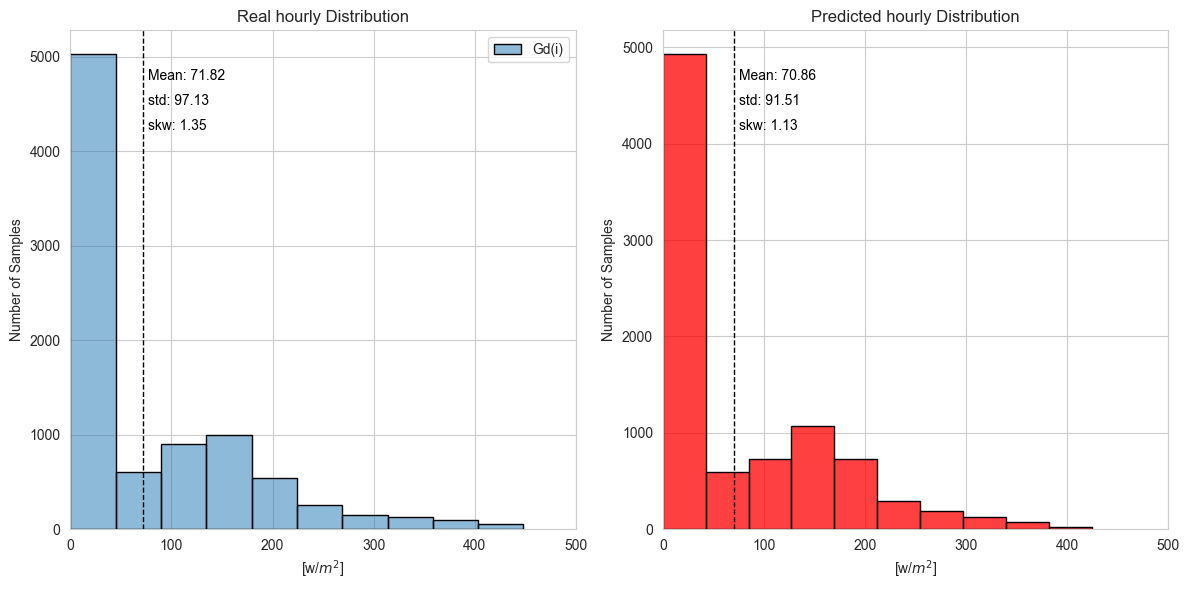

In [54]:
import seaborn as sns

mean_real = real_solar.mean()[0]
std_real = np.std(real_solar)[0]
skw_real = real_solar.skew()[0]

mean_predicted = abs(predicted_solar).mean()
std_predicted = np.std(abs(predicted_solar))
skw_predicted = abs(pd.DataFrame(predicted_solar)).skew()[0]


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(real_solar, kde=False, bins=10, color='blue', edgecolor='black', ax=axs[0])
axs[0].set_title('Real hourly Distribution')
axs[0].set_xlabel('[w/$m^2$]')
axs[0].set_ylabel('Number of Samples')
axs[0].set_xlim(0,500)


axs[0].axvline(mean_real, color='k', linestyle='dashed', linewidth=1)
axs[0].text(mean_real+5, max(axs[0].get_ylim())*0.9, 'Mean: {:.2f}'.format(mean_real), color = 'black')

# axs[0].axvline(mean_real+std_real, color='red', linestyle='dashed', linewidth=1)
axs[0].text(mean_real+5, max(axs[0].get_ylim())*0.85, 'std: {:.2f}'.format(std_real), color = 'black')
axs[0].text(mean_real+5, max(axs[0].get_ylim())*0.8, 'skw: {:.2f}'.format(skw_real), color = 'black')
# 
# axs[0].axvline(mean_real-std_real, color='red', linestyle='dashed', linewidth=1)
# axs[0].text(mean_real-std_real, max(axs[0].get_ylim())*0.9, '-std: {:.2f}'.format(mean_real-std_real), color = 'black')


sns.histplot(predicted_solar, kde=False, bins=10, color='red', edgecolor='black', ax=axs[1])
axs[1].set_title('Predicted hourly Distribution')
axs[1].set_xlabel('[w/$m^2$]')
axs[1].set_ylabel('Number of Samples')
axs[1].set_xlim(0,500)


axs[1].axvline(mean_predicted, color='k', linestyle='dashed', linewidth=1)
axs[1].text(mean_predicted+5, max(axs[1].get_ylim())*0.9, 'Mean: {:.2f}'.format(mean_predicted), color = 'black')

# axs[1].axvline(mean_predicted+std_predicted, color='red', linestyle='dashed', linewidth=1)
axs[1].text(mean_predicted+5, max(axs[1].get_ylim())*0.85, 'std: {:.2f}'.format(std_predicted), color = 'black')
axs[1].text(mean_predicted+5, max(axs[1].get_ylim())*0.8, 'skw: {:.2f}'.format(skw_predicted), color = 'black')
# 
# axs[1].axvline(mean_predicted-std_predicted, color='red', linestyle='dashed', linewidth=1)
# axs[1].text(mean_predicted-std_predicted, max(axs[1].get_ylim())*0.9, '-std: {:.2f}'.format(mean_predicted-std_predicted), color = 'black')

plt.tight_layout()
plt.show()

In [56]:
data = pd.concat([pd.DataFrame(predicted_solar),real_solar], axis=1)

In [57]:
data = data.rename(columns={0: "predicted", 'Gd(i)': "real"})

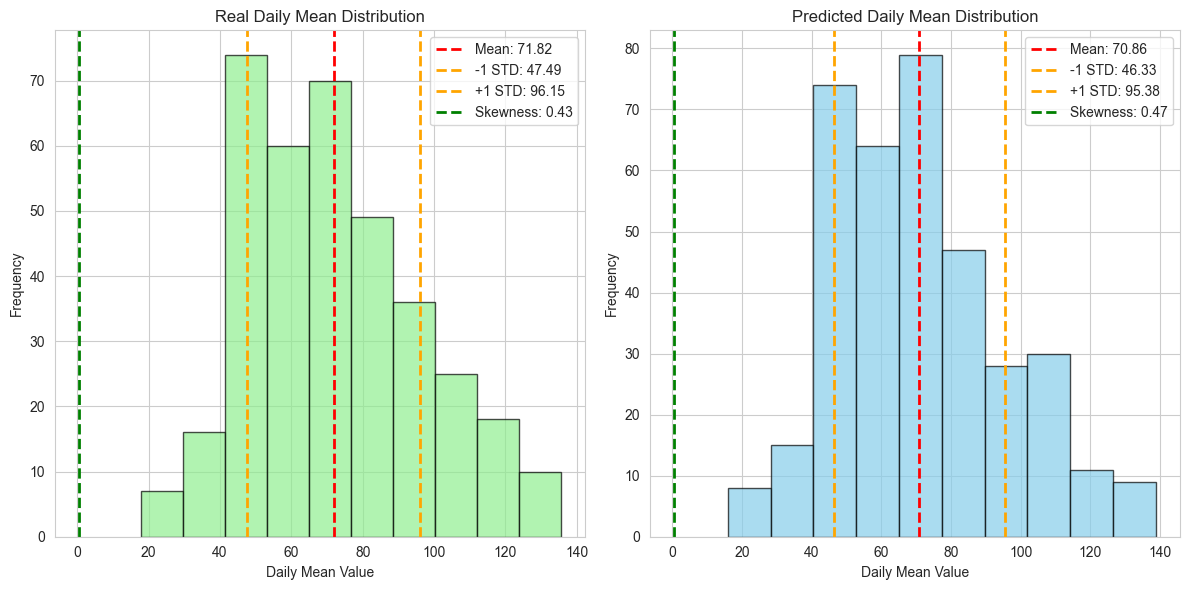

In [59]:
from scipy.stats import skew

daily_means = data.groupby(np.arange(len(data)) // 24).mean()
# Calculate mean, standard deviation, and skewness for both datasets
daily_means
stats_predicted = {
    'mean': daily_means['predicted'].mean(),
    'std': daily_means['predicted'].std(),
    'skewness': skew(daily_means['predicted'])
}

stats_real = {
    'mean': daily_means['real'].mean(),
    'std': daily_means['real'].std(),
    'skewness': skew(daily_means['real'])
}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Real Daily Means Plot
axes[0].hist(daily_means['real'], color='lightgreen', edgecolor='black', alpha=0.7)
axes[0].axvline(stats_real['mean'], color='red', linestyle='dashed', linewidth=2, label=f"Mean: {stats_real['mean']:.2f}")
axes[0].axvline(stats_real['mean'] - stats_real['std'], color='orange', linestyle='dashed', linewidth=2, label=f"-1 STD: {stats_real['mean'] - stats_real['std']:.2f}")
axes[0].axvline(stats_real['mean'] + stats_real['std'], color='orange', linestyle='dashed', linewidth=2, label=f"+1 STD: {stats_real['mean'] + stats_real['std']:.2f}")
axes[0].axvline(stats_real['skewness'], color='green', linestyle='dashed', linewidth=2, label=f"Skewness: {stats_real['skewness']:.2f}")
axes[0].set_title('Real Daily Mean Distribution')
axes[0].set_xlabel('Daily Mean Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True)

# Predicted Daily Means Plot
axes[1].hist(daily_means['predicted'], color='skyblue', edgecolor='black', alpha=0.7)
axes[1].axvline(stats_predicted['mean'], color='red', linestyle='dashed', linewidth=2, label=f"Mean: {stats_predicted['mean']:.2f}")
axes[1].axvline(stats_predicted['mean'] - stats_predicted['std'], color='orange', linestyle='dashed', linewidth=2, label=f"-1 STD: {stats_predicted['mean'] - stats_predicted['std']:.2f}")
axes[1].axvline(stats_predicted['mean'] + stats_predicted['std'], color='orange', linestyle='dashed', linewidth=2, label=f"+1 STD: {stats_predicted['mean'] + stats_predicted['std']:.2f}")
axes[1].axvline(stats_predicted['skewness'], color='green', linestyle='dashed', linewidth=2, label=f"Skewness: {stats_predicted['skewness']:.2f}")
axes[1].set_title('Predicted Daily Mean Distribution')
axes[1].set_xlabel('Daily Mean Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True)



plt.tight_layout()
plt.show()


# Wind Speed

In [67]:
daily_averages = df_filtered.resample('D').mean()
train_features = []
train_labels = []

# Loop over each day, aligning daily averages with the same day's hourly values
for i in range(len(daily_averages)):
    # Get daily average for the current day
    daily_avg = daily_averages.iloc[i]

    # Get the 24 hourly values for the same day
    hourly_values = df_filtered['wind_speed'][i*24:(i+1)*24]

    # Ensure we have 24 hourly values
    if len(hourly_values) == 24:
        train_features.append(daily_avg.values)
        train_labels.append(hourly_values.values)

In [68]:
# Calculate indices for splitting
total_samples = len(train_features)
train_end = int(total_samples * 0.7)
val_end = int(total_samples * 0.85)

# Split the dataset
train_feat, train_lab = train_features[:train_end], train_labels[:train_end]
val_features, val_labels = train_features[train_end:val_end], train_labels[train_end:val_end]
test_features, test_labels = train_features[val_end:], train_labels[val_end:]
train_feat = np.vstack(train_feat)
train_lab = np.vstack(train_lab)

val_features = np.vstack(val_features)
val_labels = np.vstack(val_labels)

test_features = np.vstack(test_features)
test_labels = np.vstack(test_labels)

In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_features)

label_scaler = MinMaxScaler()
label_scaler.fit_transform(train_labels)

# Transform both training and test data
train_features_scaled = scaler.transform(train_feat)
train_lab_scaled = label_scaler.transform(train_lab)

test_features_scaled = scaler.transform(test_features)
test_labels_scaled = label_scaler.transform(test_labels)

val_features_scaled = scaler.transform(val_features)
val_labels_scaled = label_scaler.transform(val_labels)

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2


l2_factor = 0.05

model = Sequential([
    Dense(units=40, activation='relu', input_shape= (train_features_scaled.shape[1],)),
    Dense(units=24)  # Output layer
])

model.compile(optimizer='sgd', loss='mae')  # Using SGD as a more efficient form of gradient descent, mse


In [71]:
# Train model
history = model.fit(train_features_scaled, train_lab_scaled, epochs=600, batch_size=10, verbose=1)


Epoch 1/600
282/282 [==============================] - 0s 317us/step - loss: 0.2000
Epoch 2/600
282/282 [==============================] - 0s 286us/step - loss: 0.1297
Epoch 3/600
282/282 [==============================] - 0s 289us/step - loss: 0.1164
Epoch 4/600
282/282 [==============================] - 0s 290us/step - loss: 0.1124
Epoch 5/600
282/282 [==============================] - 0s 281us/step - loss: 0.1096
Epoch 6/600
282/282 [==============================] - 0s 289us/step - loss: 0.1074
Epoch 7/600
282/282 [==============================] - 0s 294us/step - loss: 0.1054
Epoch 8/600
282/282 [==============================] - 0s 285us/step - loss: 0.1037
Epoch 9/600
282/282 [==============================] - 0s 290us/step - loss: 0.1021
Epoch 10/600
282/282 [==============================] - 0s 285us/step - loss: 0.1005
Epoch 11/600
282/282 [==============================] - 0s 285us/step - loss: 0.0990
Epoch 12/600
282/282 [==============================] - 0s 284us/step - lo

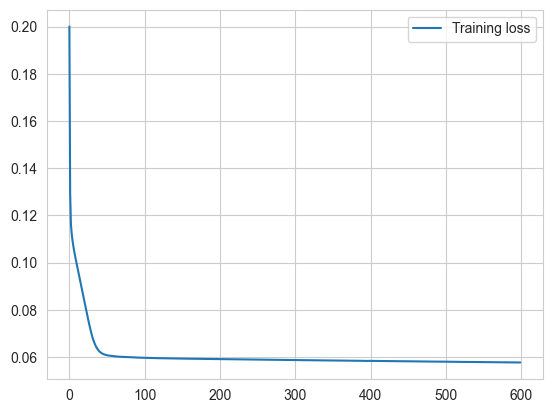

In [72]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.legend()
plt.show()

In [73]:
# Evaluate the model
loss = model.evaluate(test_features_scaled, test_labels_scaled, verbose=0)
print(f"Test MSE: {loss}")


Test MSE: 0.05583053082227707


In [74]:
predictions_test = model.predict(test_features_scaled)
loss = model.evaluate(val_features_scaled, val_labels_scaled, verbose=0)
print(f"Test MSE: {loss}")

19/19 [==============================] - 0s 333us/step
Test MSE: 0.06040462478995323


In [75]:
df_2006 = df_filtered.loc['2005-01-01 00:00:00':'2005-12-31 23:00:00']
daily_averages_2006 = df_2006.resample('D').mean()
daily_averages_2006_scaled = scaler.transform(daily_averages_2006)
predicted_hourly_values_scaled = model.predict(daily_averages_2006_scaled)
predicted_hourly_values_scaled = np.where(predicted_hourly_values_scaled < 0, 0, predicted_hourly_values_scaled)
predicted_hourly_values_unscaled = label_scaler.inverse_transform(predicted_hourly_values_scaled)
predicted_hourly_values_1D = predicted_hourly_values_unscaled.reshape(-1)

12/12 [==============================] - 0s 402us/step


/Users/roozbeh/anaconda3/envs/SEST/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


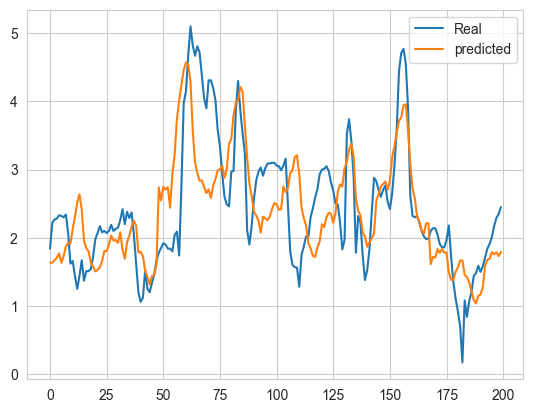

In [76]:
start_hour = 0
end_hour = 200
# Extract the subset for both predicted and actual values
subset_predicted = predicted_hourly_values_1D[start_hour:end_hour]
subset_actual = df_2006['wind_speed'][start_hour:end_hour]

plt.plot(pd.DataFrame(subset_actual).reset_index(drop=True), label='Real')
plt.plot(subset_predicted, label='predicted')
plt.legend()
plt.show()


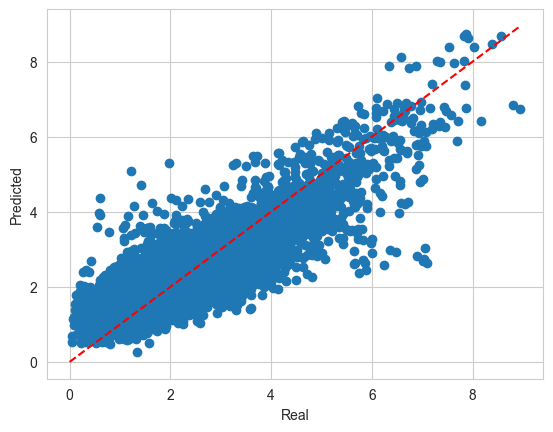

In [77]:
real_solar = pd.DataFrame(df_2006['wind_speed']).reset_index(drop=True)
predicted_solar = predicted_hourly_values_1D
plt.scatter(real_solar, predicted_solar)
max_value = max(max(real_solar.values)[0], predicted_solar.max())
min_value = min(min(real_solar.values)[0], predicted_solar.min())
plt.plot([0, max_value], [0, max_value], 'r--')  # Red dashed line
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [80]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(pd.DataFrame(df_2006['wind_speed']).reset_index(drop=True), predicted_hourly_values_1D))
r_squared = r2_score(pd.DataFrame(df_2006['wind_speed']).reset_index(drop=True), predicted_hourly_values_1D)
print("R-squared:", r_squared)
print("RMSE:", rmse)

R-squared: 0.734686664612785
RMSE: 0.6368129227796818


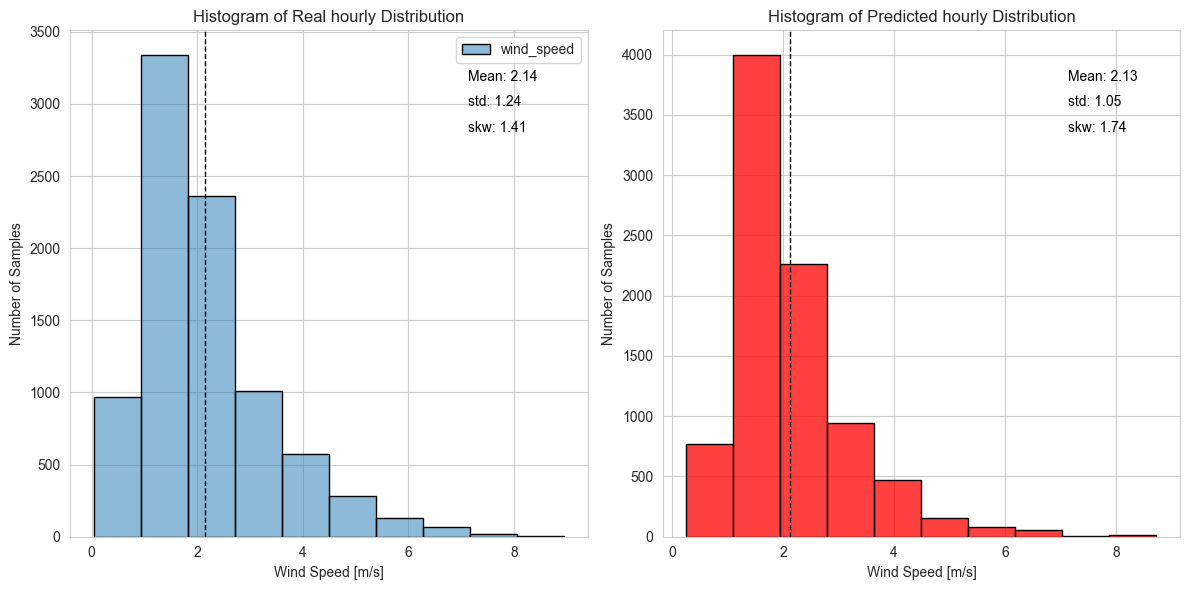

In [78]:
import seaborn as sns

mean_real = real_solar.mean()[0]
std_real = np.std(real_solar)[0]
skw_real = real_solar.skew()[0]

mean_predicted = abs(predicted_solar).mean()
std_predicted = np.std(abs(predicted_solar))
skw_predicted = abs(pd.DataFrame(predicted_solar)).skew()[0]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(real_solar, kde=False, bins=10, color='blue', edgecolor='black', ax=axs[0])
axs[0].set_title('Histogram of Real hourly Distribution')
axs[0].set_xlabel('Wind Speed [m/s]')
axs[0].set_ylabel('Number of Samples')
# axs[0].set_xlim(0, 500)

axs[0].axvline(mean_real, color='k', linestyle='dashed', linewidth=1)
axs[0].text(mean_real + 5, max(axs[0].get_ylim()) * 0.9, 'Mean: {:.2f}'.format(mean_real), color='black')

# axs[0].axvline(mean_real+std_real, color='red', linestyle='dashed', linewidth=1)
axs[0].text(mean_real + 5, max(axs[0].get_ylim()) * 0.85, 'std: {:.2f}'.format(std_real), color='black')
axs[0].text(mean_real + 5, max(axs[0].get_ylim()) * 0.8, 'skw: {:.2f}'.format(skw_real), color='black')
# 
# axs[0].axvline(mean_real-std_real, color='red', linestyle='dashed', linewidth=1)
# axs[0].text(mean_real-std_real, max(axs[0].get_ylim())*0.9, '-std: {:.2f}'.format(mean_real-std_real), color = 'black')


sns.histplot(predicted_solar, kde=False, bins=10, color='red', edgecolor='black', ax=axs[1])
axs[1].set_title('Histogram of Predicted hourly Distribution')
axs[1].set_xlabel('Wind Speed [m/s]')
axs[1].set_ylabel('Number of Samples')
# axs[1].set_xlim(0, 500)

axs[1].axvline(mean_predicted, color='k', linestyle='dashed', linewidth=1)
axs[1].text(mean_predicted + 5, max(axs[1].get_ylim()) * 0.9, 'Mean: {:.2f}'.format(mean_predicted), color='black')

# axs[1].axvline(mean_predicted+std_predicted, color='red', linestyle='dashed', linewidth=1)
axs[1].text(mean_predicted + 5, max(axs[1].get_ylim()) * 0.85, 'std: {:.2f}'.format(std_predicted), color='black')
axs[1].text(mean_predicted + 5, max(axs[1].get_ylim()) * 0.8, 'skw: {:.2f}'.format(skw_predicted), color='black')
# 
# axs[1].axvline(mean_predicted-std_predicted, color='red', linestyle='dashed', linewidth=1)
# axs[1].text(mean_predicted-std_predicted, max(axs[1].get_ylim())*0.9, '-std: {:.2f}'.format(mean_predicted-std_predicted), color = 'black')

plt.tight_layout()
plt.show()



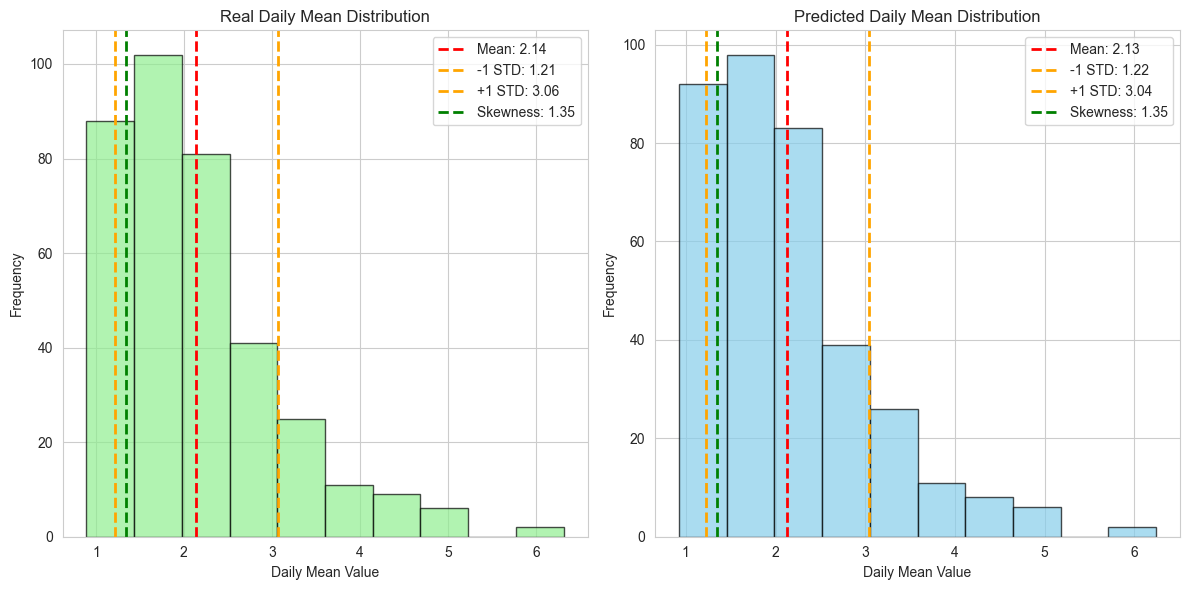

In [79]:
data = pd.concat([pd.DataFrame(predicted_solar), real_solar], axis=1)
data = data.rename(columns={0: "predicted", 'wind_speed': "real"})
from scipy.stats import skew

daily_means = data.groupby(np.arange(len(data)) // 24).mean()
# Calculate mean, standard deviation, and skewness for both datasets
daily_means
stats_predicted = {
    'mean': daily_means['predicted'].mean(),
    'std': daily_means['predicted'].std(),
    'skewness': skew(daily_means['predicted'])
}

stats_real = {
    'mean': daily_means['real'].mean(),
    'std': daily_means['real'].std(),
    'skewness': skew(daily_means['real'])
}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Real Daily Means Plot
axes[0].hist(daily_means['real'], color='lightgreen', edgecolor='black', alpha=0.7)
axes[0].axvline(stats_real['mean'], color='red', linestyle='dashed', linewidth=2,
                label=f"Mean: {stats_real['mean']:.2f}")
axes[0].axvline(stats_real['mean'] - stats_real['std'], color='orange', linestyle='dashed', linewidth=2,
                label=f"-1 STD: {stats_real['mean'] - stats_real['std']:.2f}")
axes[0].axvline(stats_real['mean'] + stats_real['std'], color='orange', linestyle='dashed', linewidth=2,
                label=f"+1 STD: {stats_real['mean'] + stats_real['std']:.2f}")
axes[0].axvline(stats_real['skewness'], color='green', linestyle='dashed', linewidth=2,
                label=f"Skewness: {stats_real['skewness']:.2f}")
axes[0].set_title('Real Daily Mean Distribution')
axes[0].set_xlabel('Daily Mean Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True)

# Predicted Daily Means Plot
axes[1].hist(daily_means['predicted'], color='skyblue', edgecolor='black', alpha=0.7)
axes[1].axvline(stats_predicted['mean'], color='red', linestyle='dashed', linewidth=2,
                label=f"Mean: {stats_predicted['mean']:.2f}")
axes[1].axvline(stats_predicted['mean'] - stats_predicted['std'], color='orange', linestyle='dashed', linewidth=2,
                label=f"-1 STD: {stats_predicted['mean'] - stats_predicted['std']:.2f}")
axes[1].axvline(stats_predicted['mean'] + stats_predicted['std'], color='orange', linestyle='dashed', linewidth=2,
                label=f"+1 STD: {stats_predicted['mean'] + stats_predicted['std']:.2f}")
axes[1].axvline(stats_predicted['skewness'], color='green', linestyle='dashed', linewidth=2,
                label=f"Skewness: {stats_predicted['skewness']:.2f}")
axes[1].set_title('Predicted Daily Mean Distribution')
axes[1].set_xlabel('Daily Mean Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True)



plt.tight_layout()
plt.show()

In [ ]:
data.corr()